In [16]:
import numpy as np
import pandas as pd
import gzip

import seaborn as sns
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'svg' # plots look nicer in svg
%matplotlib inline
sns.set()


In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('data_capstone_2/reviews_Patio_Lawn_and_Garden_5.json.gz')

In [3]:
df.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1JZFGZEZVWQPY,B00002N674,"Carter H ""1amazonreviewer@gmail . com""","[4, 4]",Good USA company that stands behind their prod...,4.0,Great Hoses,1308614400,"06 21, 2011"


### Information about the DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13272 entries, 0 to 13271
Data columns (total 9 columns):
reviewerID        13272 non-null object
asin              13272 non-null object
reviewerName      13107 non-null object
helpful           13272 non-null object
reviewText        13272 non-null object
overall           13272 non-null float64
summary           13272 non-null object
unixReviewTime    13272 non-null int64
reviewTime        13272 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 1.0+ MB


### What we learned from the information:

    * We have the shape, 13272 observations(records or rows) and 9 columns (or variables).
    * There is no missing value.
    * There are two variables related with date but data types are not datetime, one of them is "int64" and the other one is "object". One time related variable will be enough for us, we can drop one of them.
    * We need to figure out that whether the "helpful" variable needs to be converted to numeric type in order to use it.
    * There are two different variables which identify reviewer/user, we can drop one of them.
    * In order to improve practical and readable coding, we need change some of the column names and also we need to convert column names to lowercase.
    
            - "reviewerID"    -->   "customer"
            - "asin"          -->   "product"
            - "reviewerName"  -->   column will be droped 
            - "reviewText"    -->   "review_text" (will be 
            - "helpful"       -->   will be splited in two columns; "pos_feedback" as positive feedback + "neg_feedback" as  negative feedback. 
            - "overall"       -->   "rating"
            - "summary"       -->   as is 
            - "unixReviewTime"-->   "time"    
            - "reviewTime"    -->   column will be droped

### Fixing learned issues

    * Creating the new columns. 
    * Dropping redundant columns
    * Changing some column names and making lowercase

#### Creating 3 new columns

In [5]:
# We will create two new columns from the "helpful" column in order to make computation easier

list1=[]
list2=[]
for item in df['helpful']:
    list1.append(item[0])
    list2.append(item[1]-item[0])
        
# 1st new column
df['pos_feedback'] = list1

# 2nd new column
df['neg_feedback'] = list2

# 3rd new column: will be joint text of review and summary columns.
df['review_text'] = df[['summary', 'reviewText']].apply(
    lambda x: ' '.join(str(y) for y in x if str(y) !='nan'), axis=1)

df.head(1)

# Number of columns increased to 12

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,pos_feedback,neg_feedback,review_text
0,A1JZFGZEZVWQPY,B00002N674,"Carter H ""1amazonreviewer@gmail . com""","[4, 4]",Good USA company that stands behind their prod...,4.0,Great Hoses,1308614400,"06 21, 2011",4,0,Great Hoses Good USA company that stands behin...


#### Dropping redundant 3 columns

In [6]:
# We will drop the "reviewerName" since we have "reviewerID" as enough for identifing the reviewer/customer
# And also we will drop the "reviewTime" column as we have another date column ("unixReviewTime")

df=df.drop(['reviewerName', 'reviewText', 'reviewTime', 'summary', 'helpful'], axis=1)
df.head(1)

# Now we have 8 columns remained

,reviewerID,asin,overall,unixReviewTime,pos_feedback,neg_feedback,review_text
0,A1JZFGZEZVWQPY,B00002N674,4.0,1308614400,4,0,Great Hoses Good USA company that stands behin...


In [12]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 

def lenght(text):
    lenght = len([w for w in nltk.word_tokenize(text)])
    return lenght

new_list = []
new_list = # visualizing postive_feedback ouliers
fig = plt.figure(figsize=(18,2))
plt.boxplot(df2['pos_feedback'], 0, 'rs', 0)
plt.title('Posive Feedback Outliers')

# visualizing negative_feedback ouliers
fig = plt.figure(figsize=(18,2))
plt.boxplot(df2['neg_feedback'], 0, 'rs', 0)
plt.title('Negative Feedback Outliers')

# detecting outliers of customers who made many reviews.
a = np.array(df2.customer.value_counts())
fig = plt.figure(figsize=(18,2))
plt.boxplot(a, 0, 'rs', 0)
plt.title('Reviews made by a single custoomer Outliers')

In [14]:
def lenght(text):
    lenght = len([w for w in nltk.word_tokenize(text)])
    return lenght

df['review_lenght'] = df['review_text'].apply(lenght)
print(df['review_lenght'].head())

0     96
1     37
2    215
3     35
4    159
Name: review_lenght, dtype: int64


In [26]:
len(df['review_lenght'][df['review_lenght']==1])

0

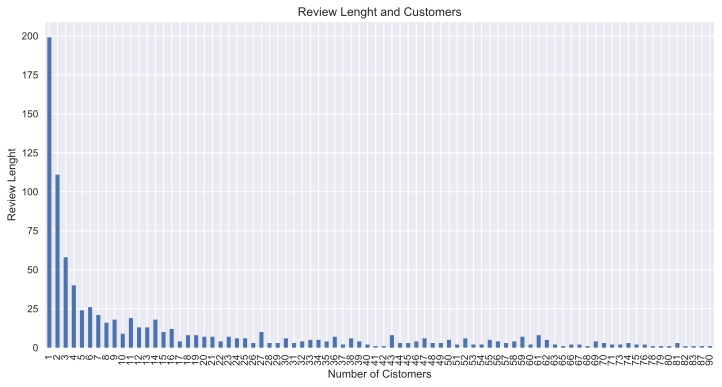

In [27]:
plt.figure(figsize = (12,6))
df_dep = (df['review_lenght'].value_counts()).value_counts().sort_index()
df_dep.plot.bar()
plt.xlabel('Number of Cistomers')
plt.ylabel('Review Lenght')
plt.title('Review Lenght and Customers')
plt.show()

#### Changing column names

In [7]:
df.columns = ['customer', 'product', 'rating', 'time', 'pos_feedback', 'neg_feedback', 'review_text']

df.head(1)

,customer,product,rating,time,pos_feedback,neg_feedback,review_text
0,A1JZFGZEZVWQPY,B00002N674,4.0,1308614400,4,0,Great Hoses Good USA company that stands behin...


### Descriptive statistics summary

In [13]:
# We can use ".describe()" method to get the statistics summary of numeric variables.

df.describe()

# We got statistics of 4 variables as we have 4 numeric variables.

,rating,time,pos_feedback,neg_feedback
count,13272.000000,1.327200e+04,13272.000000,13272.000000
mean,4.186483,1.358624e+09,3.233424,0.523282
std,1.084114,4.709839e+07,20.279594,2.765096
min,1.000000,9.548928e+08,0.000000,0.000000
25%,4.000000,1.341965e+09,0.000000,0.000000
50%,5.000000,1.370304e+09,0.000000,0.000000
75%,5.000000,1.393546e+09,1.000000,0.000000
max,5.000000,1.405987e+09,923.000000,167.000000


#### Statistics of non-numeric variables

In [15]:
# Although they are not numeric we can produce statistics from non-numeric variables

print('\nNumber of unique customers: {}\n\nNumber of unique products: {}'.
      format(len(df['customer'].unique()), len(df['product'].unique())))

print('\nReview per customer: {}\n\nReview per product: {}\n'.
         format((len(df)/len(df['customer'].unique())), (len(df)/len(df['product'].unique()))))

# We produced 4 additional statistics with non-numeric variables.


Number of unique customers: 1686

Number of unique products: 962

Review per customer: 7.871886120996441

Review per product: 13.796257796257796



### What we learned from the statistics summary

    * Rating:
      - Mean of the ratings is more than 4 out of 5. It means that people are tendentious to giving high ratings. "std" value (1.084) and percentile values show that 1 and 2 star ratings are rare. 
      - Small numbers of "ratings under 4" will decrease the predictability of these ratings. To overcome this problem we need to split the ratings in to two groups as "good" and "bad" ratings.

    * total votes (t_votes) and positive votes (p_votes):
      - Their means are more than 3.0 but percentile values shows that more than half of the reviews don't have "helpful"votes.
      - They have outliers and should be cleaned or imputed. 

    * Non-numeric variables statistics:
      - Some customers have more than one ratings and most probably we have some outliers.
      - All ratings do not belong to diffent different people

### Cleaning the Text

In [20]:
# Let's put aside number of raw tokens in order to measure of cleaned tokens
from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (df["review_text"].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))

Number of raw tokens: 2438779


In [18]:
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
import contractions
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

# html_tags removal
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

# accented_chars removal
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

# special_characters removal
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


# Lemmatization
lemmatizer=WordNetLemmatizer()

                     
def lemmatize_text(text):
    text = " ".join(lemmatizer.lemmatize(w) for w in text.split(' '))
    return text

# Creating stopwordlist and editing 
stopword_list= stopwords.words('english')
    
# "no" and "not" may give us information so those are removed from stop lists
stopword_list.remove('no')
stopword_list.remove('not')
                     
def remove_stopwords(text, stop_words=stopword_list):
    tokens = [w for w in nltk.word_tokenize(text) if w not in stop_words]
    return ' '.join(tokens)    

                     

def normalize_text(text, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    # strip HTML
    if html_stripping:
        text = strip_html_tags(text)
        
    # expand contractions    
    if contraction_expansion:
        text = contractions.fix(text)
        
    # remove accented characters
    if accented_char_removal:
        text = remove_accented_chars(text)

    # lowercase the text    
    if text_lower_case:
        text = text.lower()
    
    # remove extra newlines
    text = re.sub(r'[\r|\n|\r\n]+', ' ',text)
    
    # remove special characters and\or digits    
    if special_char_removal:
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        text = special_char_pattern.sub(" \\1 ", text)
        text = remove_special_characters(text, remove_digits=remove_digits)  
    
    # remove extra whitespace and underscore
    text = re.sub(' +', ' ', text)
    text = re.sub('_+', '', text)
    
    # lemmatize text
    if text_lemmatization:
        text = lemmatize_text(text)
        
    # remove stopwords
    if stopword_removal:
        text = remove_stopwords(text)
       
    return text

In [19]:
df['clean_text'] = df['review_text'].map(lambda text: normalize_text(text))
df.head(1)

,customer,product,rating,time,pos_feedback,neg_feedback,review_text,clean_text
0,A1JZFGZEZVWQPY,B00002N674,4.0,1308614400,4,0,Great Hoses Good USA company that stands behin...,great hose good usa company stand behind produ...


In [25]:
# Let's put aside number of raw tokens in order to measure of cleaned tokens
from nltk.tokenize import word_tokenize
clean_tokens=len([w for t in (df["clean_text"].apply(word_tokenize)) for w in t])
print('Number of clean tokens: {}\n'.format(clean_tokens))
print('Percentage of removed tokens: {0:.2f}'.format(1-(clean_tokens/raw_tokens)))

Number of clean tokens: 1124125

Percentage of removed tokens: 0.54


In [26]:
df.to_csv('nlp_reviews_cleaned.csv', sep=',', encoding='utf-8')